- Principal Component Analysis (PCA) is a technique for dimensionality reduction that identifies a set of orthogonal axes, called principal components, that capture the maximum variance in the data.

- The first principal component captures the most variation in the data, but the second principal component captures the maximum variance that is orthogonal to the first principal component, and so on

- Mean centering ensures the dataset is shifted so its mean is zero along each feature, which is essential for PCA
- The covariance matrix measures how features vary together.
- Decomposes the covariance matrix into eigenvalues and eigenvectors.
- Eigenvalues measure the variance captured by each principal component.
- Eigenvectors define the directions of the principal components.

- Reduces the dataset to 2 dimensions using UMAP, which preserves local structure and relationships in the data.

- Reduces the dataset to 2 dimensions using t-SNE, which captures non-linear structures in high-dimensional data.


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data shape: (1000, 500)
Mean of centered data (should be near zero): [ 4.32709424e-17 -7.09432513e-17  1.72417636e-16 -2.39044895e-17
  6.13398221e-17 -9.41052791e-17  7.86593013e-17  2.97539771e-16
 -4.21884749e-17  2.00395256e-16  1.30034872e-17 -2.81663581e-16
  7.16093851e-17  5.79536419e-17 -3.99125177e-17 -2.15161222e-16
  7.88258347e-17  2.86715096e-17 -9.53681578e-17  1.29618538e-16
  1.67921232e-16 -1.09523501e-16 -3.04756220e-16 -6.38378239e-17
 -1.99840144e-17  1.56458180e-16  5.55111512e-18 -1.51961776e-18
  3.63042929e-17 -1.21125332e-16 -7.99360578e-18  2.02615702e-17
 -2.76556555e-16  4.94049246e-18 -4.72052952e-17 -1.61676228e-17
 -2.74780199e-18 -6.78734846e-16 -4.32986980e-17 -4.01900735e-17
  1.07358566e-16 -4.85306240e-17 -2.69034794e-16 -4.50750548e-17
  1.65853442e-16 -1.71390679e-17  8.84015083e-17 -2.61457522e-17
  2.21822560e-16 -9.63951141e-17 -5.16253706e-18  6.75570710e-17
  5.37070388e-17  1.36002321e-16 -5.58303404e-17  1.27398092e-17
 -6.03406214e-17  3.4

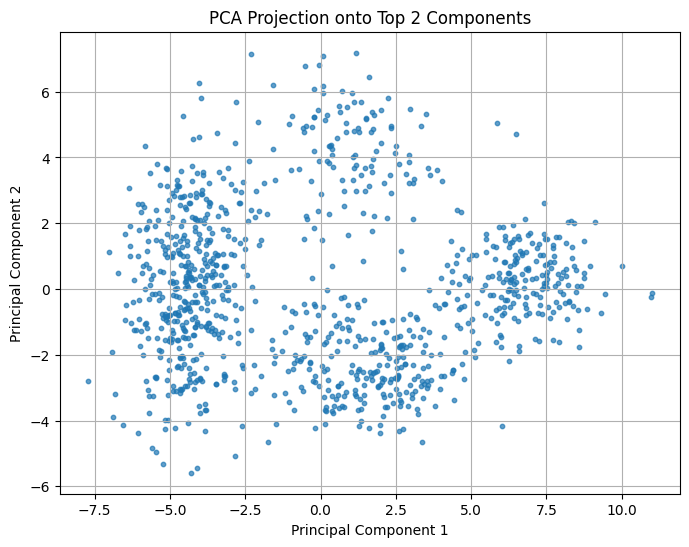

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


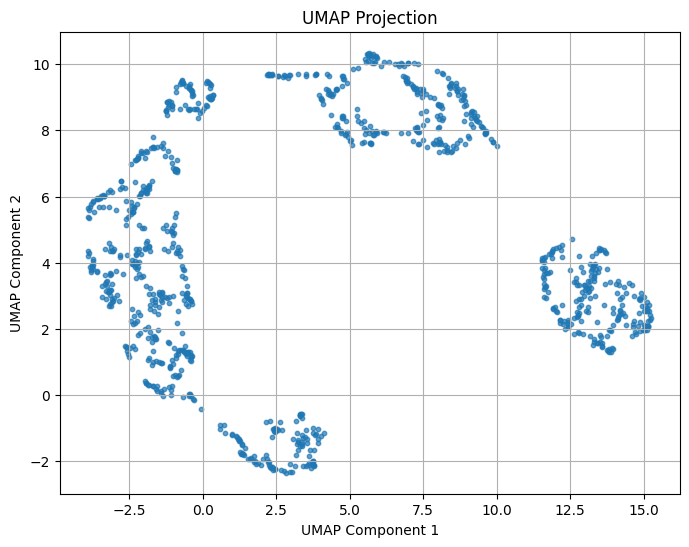

c:\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_f

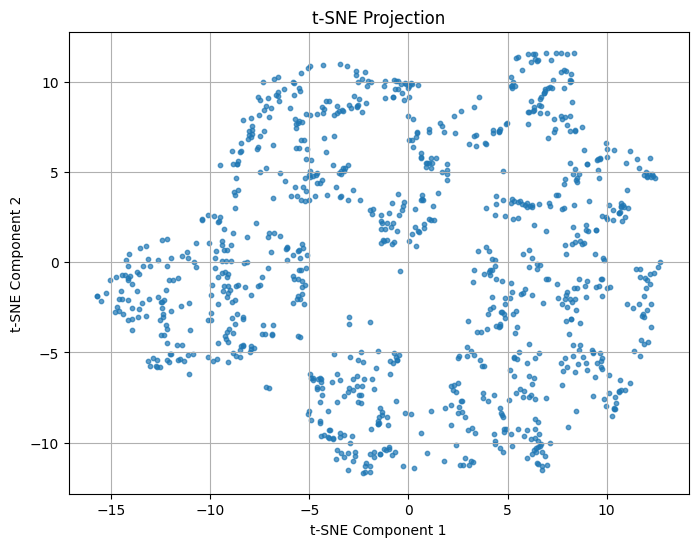

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# Load the dataset
file_path = 'pca_data.txt' 
data = np.loadtxt(file_path, delimiter=' ')

# Check Shaoe
print(f"Data shape: {data.shape}")

# Center the data
mean = np.mean(data, axis=0)
data_centered = data - mean

print(f"Mean of centered data (should be near zero): {np.mean(data_centered, axis=0)}")

# Covariance matrix
cov_matrix = np.cov(data_centered, rowvar=False)

print(f"Covariance matrix shape: {cov_matrix.shape}")

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(f"Top 2 eigenvalues: {eigenvalues[:2]}")

# Select the top 2 eigenvectors
top_2_eigenvectors = eigenvectors[:, :2]

# Project the data
projected_data = np.dot(data_centered, top_2_eigenvectors)

print(f"Projected data shape: {projected_data.shape}")

# PCA Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], s=10, alpha=0.7)
plt.title('PCA Projection onto Top 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# UMAP Visualization
import umap.umap_ as umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid()
plt.show()


# t-SNE Visualization

"""
Parameters:
n_components=2: Target dimensionality.
perplexity=30: Controls the balance between local and global structure.
n_iter=300: Number of optimization iterations.
"""

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_embedding = tsne.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=10, alpha=0.7)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()


Expectation-Maximization (EM) algorithm to estimate the parameters of a Poisson Mixture Model. It assumes that the dataset contains the number of children in 1000 families, some of which used family planning (Poisson with parameter 𝜆1 ) and some which didn’t (Poisson with parameter 
𝜆
2).

The goal is to:

Estimate 
𝜆
1
​
  (mean number of children in families with family planning).
Estimate 
𝜆
2
​
  (mean number of children in families without family planning).
Estimate 
𝜋
1
​
  and 
𝜋
2
​
  (proportions of families with and without family planning).


λ 
1
​
 ,λ 
2
​
 : Initial guesses for the Poisson means, chosen randomly.
π 
1
​
 ,π 
2
​
 : Initial proportions, starting with equal probability (0.5 each).

- p 
1 : Probability that a family with data[i] children comes from the "with family planning" group.
𝑝
2
​
 : Probability that a family comes from the "without family planning" group.
𝛾
1
,
𝛾
2
​
 : Soft assignments (responsibilities), which estimate how much each data point belongs to either group.


In [ ]:
import numpy as np

file_path = 'em_data.txt'  
data = np.loadtxt(file_path)

print(f"Data shape: {data.shape}")
print(f"First few entries: {data[:10]}")


# Initialization
np.random.seed(42)  # For reproducibility
lambda_1 = np.random.uniform(1, 5)  # Randomly initialize
lambda_2 = np.random.uniform(5, 10)
pi_1 = 0.5  # Start with equal proportions
pi_2 = 1 - pi_1

print(f"Initial lambda_1: {lambda_1}, lambda_2: {lambda_2}")
print(f"Initial pi_1: {pi_1}, pi_2: {pi_2}")


from scipy.stats import poisson

def e_step(data, lambda_1, lambda_2, pi_1, pi_2):
    # Calculate probabilities
    p1 = pi_1 * poisson.pmf(data, lambda_1)
    p2 = pi_2 * poisson.pmf(data, lambda_2)
    
    # Calculate responsibilities
    gamma_1 = p1 / (p1 + p2)
    gamma_2 = 1 - gamma_1
    
    return gamma_1, gamma_2


def m_step(data, gamma_1, gamma_2):
    # Update proportions
    pi_1 = np.mean(gamma_1)
    pi_2 = 1 - pi_1
    
    # Update means
    lambda_1 = np.sum(gamma_1 * data) / np.sum(gamma_1)
    lambda_2 = np.sum(gamma_2 * data) / np.sum(gamma_2)
    
    return lambda_1, lambda_2, pi_1, pi_2


# E-Step: Calculate responsibilities (𝛾1,𝛾2) for all data points

# M-Step: Update  𝜆1,𝜆2,𝜋1,𝜋2  using the responsibilities.

# Iterative EM Algorithm
def em_algorithm(data, max_iter=100, tol=1e-6):
    # Initialization
    lambda_1, lambda_2 = np.random.uniform(1, 5), np.random.uniform(5, 10)
    pi_1, pi_2 = 0.5, 0.5
    
    for iteration in range(max_iter):
        # E-step
        gamma_1, gamma_2 = e_step(data, lambda_1, lambda_2, pi_1, pi_2)
        
        # M-step
        lambda_1_new, lambda_2_new, pi_1_new, pi_2_new = m_step(data, gamma_1, gamma_2)
        
        # Check convergence
        if (abs(lambda_1 - lambda_1_new) < tol and 
            abs(lambda_2 - lambda_2_new) < tol and 
            abs(pi_1 - pi_1_new) < tol):
            print(f"Converged in {iteration + 1} iterations.")
            break
        
        # Update parameters
        lambda_1, lambda_2, pi_1, pi_2 = lambda_1_new, lambda_2_new, pi_1_new, pi_2_new
    
    return lambda_1, lambda_2, pi_1, pi_2


lambda_1, lambda_2, pi_1, pi_2 = em_algorithm(data)

print(f"Estimated lambda_1 (mean with family planning): {lambda_1:.2f}")
print(f"Estimated lambda_2 (mean without family planning): {lambda_2:.2f}")
print(f"Estimated pi_1 (proportion with family planning): {pi_1:.2f}")
print(f"Estimated pi_2 (proportion without family planning): {pi_2:.2f}")


Data shape: (1000,)
First few entries: [0. 2. 0. 1. 4. 8. 3. 3. 3. 3.]
Initial lambda_1: 2.49816047538945, lambda_2: 9.75357153204958
Initial pi_1: 0.5, pi_2: 0.5
Estimated lambda_1 (mean with family planning): 1.79
Estimated lambda_2 (mean without family planning): 4.92
Estimated pi_1 (proportion with family planning): 0.36
Estimated pi_2 (proportion without family planning): 0.64
